In [4]:
# Practice getting NFL data and making data tables

In [5]:
from sportsipy.nfl.schedule import Schedule
from sportsipy.nfl.teams import Teams
import pandas as pd
from sportsipy.nfl.boxscore import Boxscores, Boxscore
from datetime import date
import requests
from bs4 import BeautifulSoup
import re
import keras
import seaborn as sns

In [6]:
teams = Teams()
df = pd.DataFrame(columns = ['Name', 'Abbreviation', 'Penalties', 'Wins', 'Pass Attempts', 'Rush Attempts', 'First Downs',
                            'Turnovers', 'Strength of Schedule', 'Rushing Yards', 'Passing Yards', 'Fumbles', 'Interceptions'])

df['Name'] = [x.name for x in teams]
df['Abbreviation'] = [x.abbreviation for x in teams]
df['Wins'] = [x.wins for x in teams]
df['Penalties'] = [x.penalties for x in teams]
df['Pass Attempts'] = [x.pass_attempts for x in teams]
df['Rush Attempts'] = [x.rush_attempts for x in teams]
df['First Downs'] = [x.first_downs for x in teams]
df['Turnovers'] = [x.turnovers for x in teams]
df['Strength of Schedule'] = [x.strength_of_schedule for x in teams]
df['Rushing Yards'] = [x.rush_yards for x in teams]
df['Passing Yards'] = [x.pass_yards for x in teams]
df['Fumbles'] = [x.fumbles for x in teams]
df['Interceptions'] = [x.interceptions for x in teams]


In [7]:
correlation_data = df[['Wins', 'Pass Attempts', 'Rush Attempts', 'Penalties', 'Turnovers', 'First Downs', 'Strength of Schedule',
                  'Rushing Yards', 'Passing Yards', 'Fumbles', 'Interceptions']]
correlation_data.corr(method ='pearson')

,Wins,Pass Attempts,Rush Attempts,Penalties,Turnovers,First Downs,Strength of Schedule,Rushing Yards,Passing Yards,Fumbles,Interceptions
Wins,1.000000,0.173512,0.398435,-0.160604,-0.295990,0.740659,-0.357957,0.321885,0.619257,-0.120767,-0.251157
Pass Attempts,0.173512,1.000000,-0.427987,0.370187,0.156574,0.465938,0.041719,-0.379161,0.736180,0.174670,0.061416
Rush Attempts,0.398435,-0.427987,1.000000,-0.029616,-0.148481,0.400392,-0.306081,0.885994,-0.194380,0.083110,-0.218652
Penalties,-0.160604,0.370187,-0.029616,1.000000,0.072800,0.130472,0.289245,-0.000773,0.196390,0.073362,0.033618
Turnovers,-0.295990,0.156574,-0.148481,0.072800,1.000000,-0.103567,0.174366,-0.186857,-0.205879,0.454481,0.818562
First Downs,0.740659,0.465938,0.400392,0.130472,-0.103567,1.000000,-0.250574,0.500362,0.688496,0.112405,-0.187615
Strength of Schedule,-0.357957,0.041719,-0.306081,0.289245,0.174366,-0.250574,1.000000,-0.267007,-0.171480,0.150826,0.096570
Rushing Yards,0.321885,-0.379161,0.885994,-0.000773,-0.186857,0.500362,-0.267007,1.000000,-0.152830,0.155905,-0.308255
Passing Yards,0.619257,0.736180,-0.194380,0.196390,-0.205879,0.688496,-0.171480,-0.152830,1.000000,-0.083848,-0.174792
Fumbles,-0.120767,0.174670,0.083110,0.073362,0.454481,0.112405,0.150826,0.155905,-0.083848,1.000000,-0.139645


<AxesSubplot:>

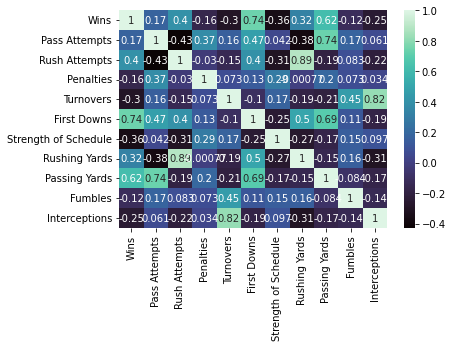

In [8]:
sns.heatmap(correlation_data.corr(), annot=True, cmap="mako")

In [9]:
# creating the date object of today's date
todays_date = date.today()

# web scrape CBS for current week
url = 'https://www.cbssports.com/nfl/schedule/'
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")
results = soup.find(id="PageTitle-header").text
try:
    current_week = int(re.search(r'\d+', results).group())
except:
    print('Not in season')

games_today = Boxscores(current_week, todays_date.year)
# Prints a dictionary of all matchups for week 1 of 2017
# games_today = pd.DataFrame.from_dict(games_today.games)

In [10]:
current_schedule = pd.DataFrame(columns = ['Away Team', 'Home Team', 'Away Score', 'Home Score', 'Winner'])

In [11]:
for key in games_today.games.keys():
        current_schedule['Away Team'] =  [item['away_name'] for item in games_today.games[key]]
        current_schedule['Home Team'] =  [item['home_name'] for item in games_today.games[key]]
        current_schedule['Away Score'] =  [item['away_score'] for item in games_today.games[key]]
        current_schedule['Home Score'] =  [item['home_score'] for item in games_today.games[key]]
        current_schedule['Winner'] =  [item['winning_name'] for item in games_today.games[key]]

In [12]:
history_of_seasons = pd.DataFrame(columns = ['Away Team', 'Home Team', 'Away Score', 'Home Score', 'Winner'])

In [13]:
year = todays_date.year
week = current_week-1
away = []
home = []
away_score = []
home_score = []
winner = []

while year >= todays_date.year-5:
    if year != todays_date.year: week = 16
    while week >= 1:
        previous_games = Boxscores(week, year)
        for key in previous_games.games.keys():
            away.extend(item['away_name'] for item in previous_games.games[key])
            home.extend(item['home_name'] for item in previous_games.games[key])
            away_score.extend(item['away_score'] for item in previous_games.games[key])
            home_score.extend(item['home_score'] for item in previous_games.games[key])
            winner.extend(item['winning_name'] for item in previous_games.games[key])
        week = week-1 
    year = year-1

In [14]:
history_of_seasons['Away Team'] =  away
history_of_seasons['Home Team'] =  home
history_of_seasons['Away Score'] = away_score
history_of_seasons['Home Score'] =  home_score
history_of_seasons['Winner'] =  winner

In [15]:
history_of_seasons=history_of_seasons.replace({'Oakland Raiders': 'Las Vegas Raiders', 'St. Louis Rams':'Los Angeles Rams',
                           'Washington Redskins':'Washington Football Team'}, regex=True)

In [16]:
history_of_seasons

,Away Team,Home Team,Away Score,Home Score,Winner
0,Dallas Cowboys,New Orleans Saints,27,17,Dallas Cowboys
1,Arizona Cardinals,Chicago Bears,33,22,Arizona Cardinals
2,Tampa Bay Buccaneers,Atlanta Falcons,30,17,Tampa Bay Buccaneers
3,Philadelphia Eagles,New York Jets,33,18,Philadelphia Eagles
4,New York Giants,Miami Dolphins,9,20,Miami Dolphins
...,...,...,...,...,...
1389,Detroit Lions,Indianapolis Colts,39,35,Detroit Lions
1390,New York Giants,Dallas Cowboys,20,19,New York Giants
1391,New England Patriots,Arizona Cardinals,23,21,New England Patriots
1392,Pittsburgh Steelers,Washington Football Team,38,16,Pittsburgh Steelers
